In [1]:
import dataset
import torch
import torchvision
from PIL import Image,ImageOps
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2

ann_path_1 = '/opt/ml/upstage_OCR/Data set/train_general.json'
ann_path_2 = '/opt/ml/upstage_OCR/Data set/gen_ann.json'
ocr_url = "http://118.222.179.32:30000/ocr/"
image_root_1 = '/opt/ml/upstage_OCR/Data set/real data/general'
image_root_2 = '/opt/ml/upstage_OCR/Data set/real data/gen_imgs'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

transform = A.Compose([
    A.Resize(512,512),
    # A.GaussNoise(var_limit=(50,100)),
    # A.MotionBlur(blur_limit=5),
    # A.Blur(5),
    # A.OneOf([
    #     A.ShiftScaleRotate(rotate_limit=(-45,45),p=1),
    #     # A.ElasticTransform(sigma=30,alpha_affine=30,p=1),
    #     ],p=0.5),
    ToTensorV2()
    ])
dataset1 = dataset.WifiDataset_segmentation(ann_path_1, ocr_url, image_root_1, preload=False, transform=transform)
dataset2 = dataset.WifiDataset_segmentation(ann_path_2, ocr_url, image_root_2, preload=False, transform=transform)

loading annotations into memory...
Done (t=0.00s)


In [7]:
idx = 2
x,y,info,mask_list = dset[idx]
image_name =info[0]['file_name']
image = Image.open(os.path.join(dset.img_root,image_name))
image = ImageOps.exif_transpose(image)
image = torchvision.transforms.ToTensor()(image)

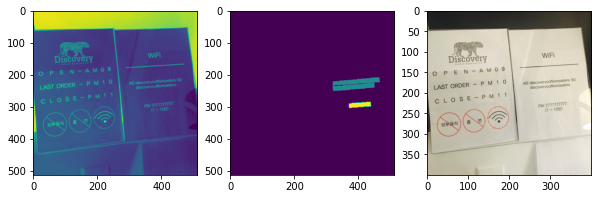

In [8]:
import matplotlib.pyplot as plt
import torchvision
t = torchvision.transforms.Compose(
    [torchvision.transforms.ToPILImage()]
)

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(t(x[0]))

plt.subplot(1,3,2)
plt.imshow(t(y.type(torch.FloatTensor)*0.5))

plt.subplot(1,3,3)
plt.imshow(t(image))

plt.show()

In [4]:
print(torch.max(x[0]))

tensor(240.)


In [5]:
import numpy as np

a = np.zeros((3,3,1))
b = np.zeros((3,3,1))

a_b = np.concatenate((a,b),axis=2)
a_b.shape

(3, 3, 2)

In [6]:
import torchvision

torchvision.transforms.ToTensor()(a_b).shape

torch.Size([2, 3, 3])